# Use Case 2 Regression
<br>
<br>
**Dataset** : Apartment Price in Victoria. 
<br>
You can download it here.
https://drive.google.com/open?id=1j8TdXtCnEQlqn2esDbiuPay01pDooS-w
<br>
**Background** : The Dataset provides living area and conservation status.
There are 218 observations and 16 variables.
<br>
**Objective** : Create a python script for the Use Case below, please upload the script after you finish.
The Problem is to determine the best model and give the reason.
<br>
Tony who has profession as a broker wants to predict apartment price in Victoria based on living area environment and apartment conservation status. Determine the best model to predict and redefine new conservation variable in 3 level, A = 1A, B = 2A, C = 2B and 3A.
<br>

**Instructions** :
Download the dataset as a CSV file and place it in your current working directory with the filename "victoria.csv".
<br><br>

1. Import Dataset: Load the dataset.
2. Exploratory Data Analysis: Create summary of the dataset, with python function. (mean, median, modus, max, min, range)
3. Data Visualization: Create any kind suitable plot of dataset, it will provide a lot of insight into the problem.
4. Variable Selection: Choose the variable and its reason.
5. Modelling: Create models using Regression
6. Accuracy or Error: Calculate the Error using the helper function from the library, from dataset only

## 1. Importing Necesary modules and dataset
<br><br>
We importing our dataet and preprocess it to remove null values, convert columns to its right types

In [85]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [35]:
data =pd.read_csv('victoria.csv')
data.head()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,228000,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,2,409000,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,3,200000,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,4,180000,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,5,443600,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


<br><br>
Drop row.labels as there are index already. 

In [36]:
data=data.drop(columns='row.labels')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 15 columns):
totalprice        218 non-null object
area              218 non-null object
zone              218 non-null object
category          218 non-null object
age               218 non-null int64
floor             218 non-null int64
rooms             218 non-null int64
out               218 non-null object
conservation      218 non-null object
toilets           218 non-null int64
garage            218 non-null int64
elevator          218 non-null int64
streetcategory    218 non-null object
heating           218 non-null object
tras              218 non-null int64
dtypes: int64(7), object(8)
memory usage: 25.6+ KB


<br><br>
Notice that in our data, there are '.' that replaced by ',' as when previously we tried to convert *price* and *area* it return error

In [37]:
data['totalprice']=data['totalprice'].str.replace(',','.')
data['area']=data['area'].str.replace(',','.')

In [38]:
#Notes that floor,rooms,toilets,garage,elevator are ordinal
data['totalprice']=data['totalprice'].astype('float64')
data['area']=data['area'].astype('float64')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 15 columns):
totalprice        218 non-null float64
area              218 non-null float64
zone              218 non-null object
category          218 non-null object
age               218 non-null int64
floor             218 non-null int64
rooms             218 non-null int64
out               218 non-null object
conservation      218 non-null object
toilets           218 non-null int64
garage            218 non-null int64
elevator          218 non-null int64
streetcategory    218 non-null object
heating           218 non-null object
tras              218 non-null int64
dtypes: float64(2), int64(7), object(6)
memory usage: 25.6+ KB


<br><br>
Changing data category to fit the above requirements

In [39]:
for i,cat in enumerate(data['conservation']):
    if (data.loc[i,'conservation']=='1A'):
        data.loc[i,'conservation']='A'
    elif(data.loc[i,'conservation']=='2A'):
        data.loc[i,'conservation']='B'
    elif (data.loc[i,'conservation']=='2B'):
        data.loc[i,'conservation']='C'
    else:
        data.loc[i,'conservation']='D'
data['conservation'].value_counts()

A    161
C     36
B     18
D      3
Name: conservation, dtype: int64

<br><br>
## 2. Create Summary

<br><br>
First we split our data into numeric data and categorical data. Then we describe each data

In [40]:
# No null value, now describe. For numeric
categ=[]
for i in data.columns:
    if data[i].dtypes=='object':
        categ.append(i)
numer=data.drop(columns=categ)
numer.describe()

,totalprice,area,age,floor,rooms,toilets,garage,elevator,tras
count,218.000000,2.180000e+02,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,280741.523853,5.718657e+09,19.899083,4.440367,4.853211,1.467890,0.243119,0.798165,0.807339
std,69298.459358,3.455007e+09,14.595590,2.126988,0.634285,0.500116,0.450881,0.402293,0.406787
min,155000.000000,5.300000e+01,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,228500.000000,1.187250e+09,11.000000,3.000000,5.000000,1.000000,0.000000,1.000000,1.000000
50%,269750.000000,7.118500e+09,16.000000,4.000000,5.000000,1.000000,0.000000,1.000000,1.000000
75%,328625.000000,8.542750e+09,24.000000,5.000000,5.000000,2.000000,0.000000,1.000000,1.000000
max,560000.000000,9.992000e+09,118.000000,12.000000,7.000000,2.000000,2.000000,1.000000,2.000000


<br><br>
There are to many values and it's hard to see description of our data. Below, we will see the visulization. 

In [41]:
categ=data[categ]
categ.describe()

,zone,category,out,conservation,streetcategory,heating
count,218,218,218,218,218,218
unique,23,7,4,4,4,4
top,Z41,3B,E100,A,S3,3A
freq,18,77,122,161,107,149


<br><br>
We see which values is the top, unique and how many frequency of them. 

## 3. Create Data Visualization

<br><br>
We viz our data by dividing them to 2 categories, numeric and category data

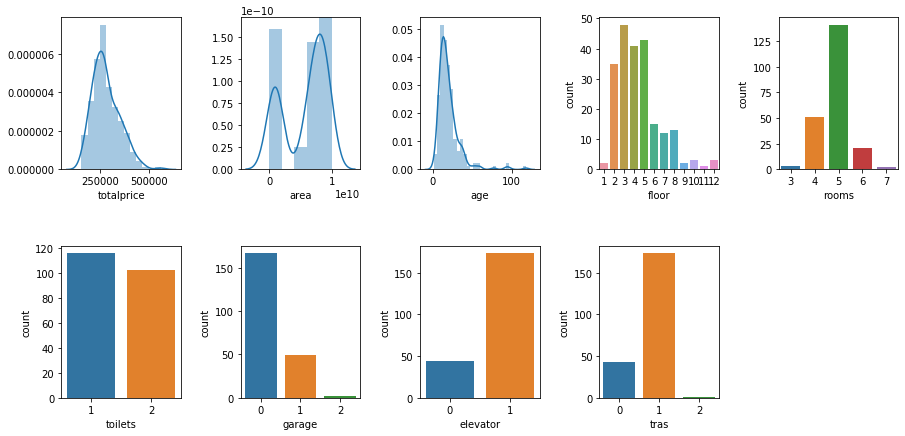

In [42]:
f=plt.figure(figsize=(15,7))
i=1
for i in range(len(numer.columns)):
    f.add_subplot(2,5,i+1)
    if i<3:
        sns.distplot(numer[numer.columns[i]])
    else:
        sns.countplot(numer[numer.columns[i]])
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

<br><br>
From here, we can see distribution, and frequency from each of our data. For example we see that total price and Age has righ skewed distribution. price that is right skewed means  mostly, our price is not expensive (compared to other value in price). in Age, this means that mostly our apartment has age 10-20 years old. We can also see that mostly there are 2-5 floors in apartmen, there are 5 rooms most and mostly ther are no garage in our apartment victoria data. You can also see other insight using our data

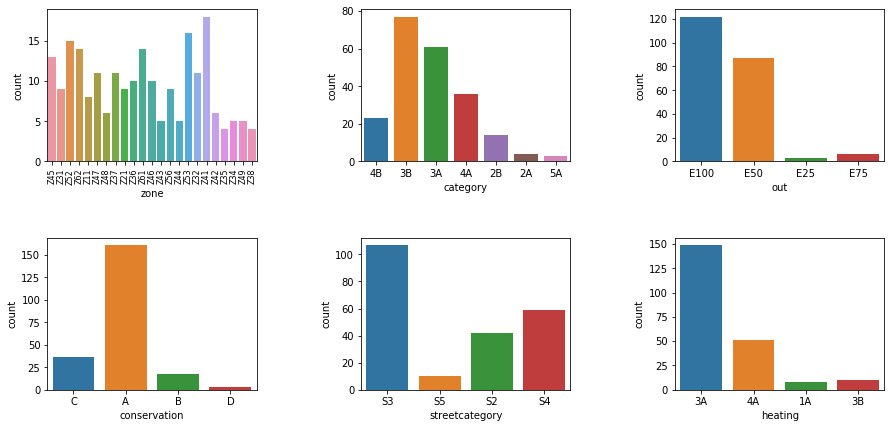

In [45]:
f=plt.figure(figsize=(15,7))
i=1
for i in range(len(categ.columns)):
    f.add_subplot(2,3,i+1)
    sns.countplot(categ[categ.columns[i]])
    if i==0:
        plt.xticks(rotation=90,fontsize=8)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    
plt.show()

<br><br>
Frome here, we see that there are various zone in our data. there are mostly s3 streetcategory, 3A heating and many more. With viz we can see more clearly and find useful insight.

## 4. Variable Selection using Correlation and Boxplot

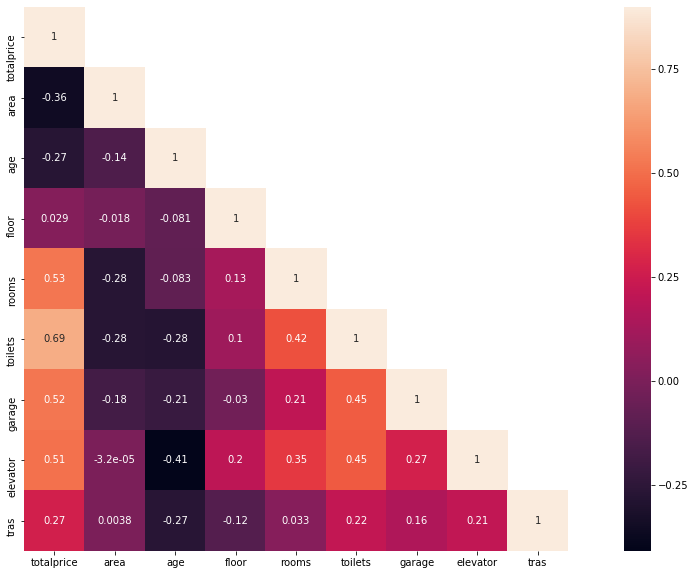

In [47]:
#create correlation with hitmap

#create correlation
corr = numer.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (20,5))
fig.set_size_inches(20,10)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

<br><br>
from here, we see that in total price, mostly numeric categories has more than 0.2, except floor. This means that using corelation, floor and total price does not has strong linearly relationship. But as famous quote says "Corelation does not imply causation (and its inverse)" we can not determine which variable should be dropped from this viz

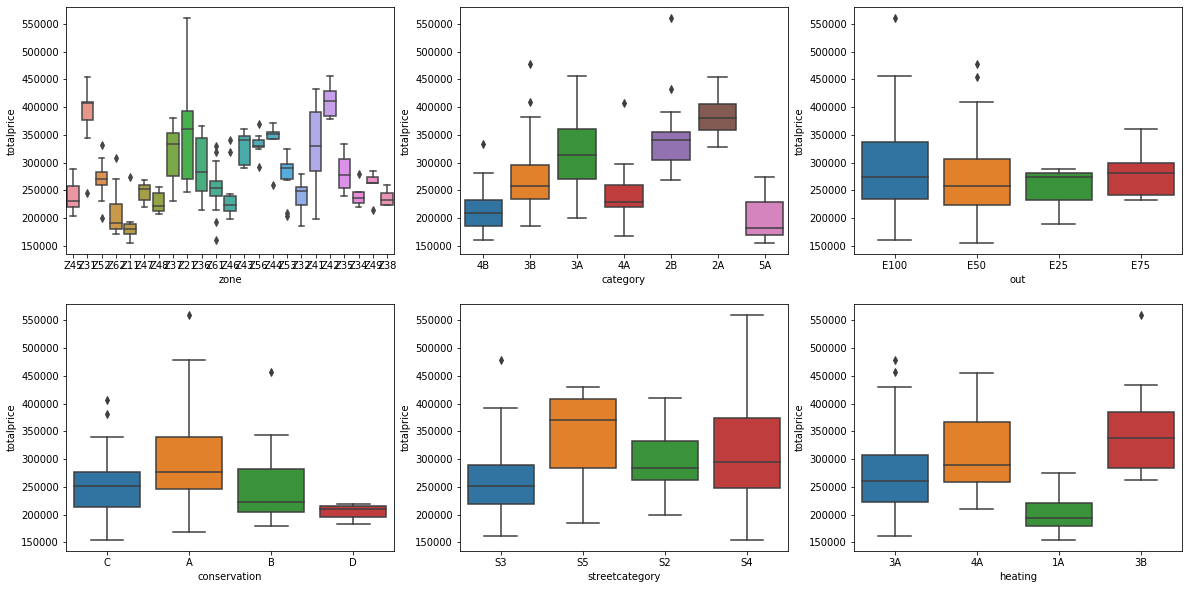

In [57]:
f=plt.figure(figsize=(20,10))
j=1
for i in categ.columns:
    f.add_subplot(2,3,j)
    sns.boxplot(x=categ[i],y=numer['totalprice'])
    j+=1
plt.show()
    

<br><br>
we see here the boxplot of each categories data to total price. We see that some category has similar distribution to each other, but as there are mostly not similar, we still use all columns. In the next step we use variable selection in regression line using p-value

## 5. Modelling and Variable Selection

<br><br>
WE use pandas get dummies to *one hot encoder* our categorical data because our machine learning model only accept non-categorical input. We use drop first as if we use all columns, we will create multicolinearity between columns. First, using all columns, we fit multiple linear regression model

In [62]:
# We use all variables 
data2=pd.get_dummies(data,drop_first=True)
X=data2.iloc[:,1:]
Y=data2.iloc[:,0]
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             totalprice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     25.36
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           4.96e-56
Time:                        15:51:14   Log-Likelihood:                -2509.3
No. Observations:                 218   AIC:                             5117.
Df Residuals:                     169   BIC:                             5282.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.121e+05    3.6e+0

<br><br>
Because there are many columns, it's kinda hard to see the result of this model. Now we dropped columns that has p-value more than 0.55. (P-value here, means how much statisticaly significant the columns to has effect on *totalprice*). more than significance level 0.05 means that statistically, that columns is not significance has effect on y (or totalprice). Notes also that we still need to see adj r-squared (higher is better) and AIC (lower is better) between models to see which model is better

In [63]:
p_val=model.pvalues
keep=p_val[p_val<0.55]
X_1=X[keep.index]
X_1.head()

model = sm.OLS(Y, X_1).fit()
predictions = model.predict(X_1) 

print('Rsquared is {}, Adj Rsquared {}, and AIC {}'.format(str(model.rsquared),str(model.rsquared_adj),str(model.aic)))

p_val=model.pvalues
keep=p_val[p_val<0.55]
X_1=X[keep.index]
X_1.head()

model = sm.OLS(Y, X_1).fit()
predictions = model.predict(X_1) 

print('Rsquared is {}, Adj Rsquared {}, and AIC {}'.format(str(model.rsquared),str(model.rsquared_adj),str(model.aic)))

Rsquared is 0.8749665369538712, Adj Rsquared 0.8525420571684241, and AIC 5092.128583218218
Rsquared is 0.8748302322736962, Adj Rsquared 0.8531792454237409, and AIC 5090.3661055166


<br><br>
After running above variables, we get better results. AIC is lower and Rsquared and Adjrquared is higher. 

In [64]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalprice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     40.41
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           3.69e-67
Time:                        15:53:10   Log-Likelihood:                -2512.2
No. Observations:                 218   AIC:                             5090.
Df Residuals:                     185   BIC:                             5202.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.234e+05    2.2e+04      5.611      0.000       8e+04    1.67e+05
area              -1.402e-06    6.2e-07     -2.261      0.025   -2.62e-06   -1.78e-07
rooms              1.867e+04   3608.245      5.173      0.000    1.15e+04    2.58e+04
toilets            3.428e+04   5751.512      5.961      0.000    2.29e+04    4.56e+04
garage             2.645e+04   5246.862      5.041      0.000    1.61e+04    3.68e+04
elevator           2.737e+04   6007.809      4.556      0.000    1.55e+04    3.92e+04
tras               1.352e+04   5124.135      2.638      0.009    3407.810    2.36e+04
zone_Z21           9.436e+04   9545.503      9.885      0.000    7.55e+04    1.13e+05
zone_Z31           8.947e+04   1.08e+04      8.285      0.000    6.82e+04    1.11e+05
zone_Z32           3.073e+04   9099.203      3.377      0.001    1.28e+04    4.87e+04
zone_Z35           5.207e+04   1.49e+04      3.500      0.001    2.27e+04    8.14e+04
zone_Z36           2.244e+04   9802.525      2.289      0.023    3098.230    4.18e+04
zone_Z37           7.836e+04   9678.668      8.096      0.000    5.93e+04    9.75e+04
zone_Z38           2.141e+04   1.39e+04      1.538      0.126   -6049.878    4.89e+04
zone_Z41            3.42e+04   8125.477      4.209      0.000    1.82e+04    5.02e+04
zone_Z42           9.806e+04   1.29e+04      7.625      0.000    7.27e+04    1.23e+05
zone_Z43           2.914e+04   1.31e+04      2.219      0.028    3230.409     5.5e+04
zone_Z44           1.936e+04   1.36e+04      1.422      0.157   -7494.127    4.62e+04
zone_Z47          -2.479e+04   9398.744     -2.638      0.009   -4.33e+04   -6251.811
zone_Z48           2.382e+04   1.17e+04      2.038      0.043     761.425    4.69e+04
zone_Z49           1.877e+04   1.26e+04      1.487      0.139   -6133.805    4.37e+04
zone_Z56           1.563e+04   1.12e+04      1.400      0.163   -6397.286    3.77e+04
category_3A        -3.06e+04   7986.743     -3.831      0.000   -4.64e+04   -1.48e+04
category_3B       -3.508e+04   8353.863     -4.199      0.000   -5.16e+04   -1.86e+04
category_4A       -3.306e+04   9688.528     -3.413      0.001   -5.22e+04    -1.4e+04
category_4B       -5.389e+04   1.05e+04     -5.115      0.000   -7.47e+04   -3.31e+04
category_5A       -7.868e+04   1.96e+04     -4.008      0.000   -1.17e+05      -4e+04
out_E25            2.673e+04   1.69e+04      1.580      0.116   -6649.414    6.01e+04
out_E50           -6890.1672   4251.927     -1.620      0.107   -1.53e+04    1498.332
conservation_B    -8474.9133   7146.735     -1.186      0.237   -2.26e+04    5624.666
streetcategory_S3  9102.2770   5890.220      1.545      0.124   -2518.361    2.07e+04
streetcategory_S4  1.271e+04   6087.608      2.089      0.038     704.818    2.47e+04
heating_3A        -1.308e+04   4833.353     -2.707      0.007   -2.26e+04

In [67]:
X_1.columns

Index(['const', 'area', 'rooms', 'toilets', 'garage', 'elevator', 'tras',
       'zone_Z21', 'zone_Z31', 'zone_Z32', 'zone_Z35', 'zone_Z36', 'zone_Z37',
       'zone_Z38', 'zone_Z41', 'zone_Z42', 'zone_Z43', 'zone_Z44', 'zone_Z47',
       'zone_Z48', 'zone_Z49', 'zone_Z56', 'category_3A', 'category_3B',
       'category_4A', 'category_4B', 'category_5A', 'out_E25', 'out_E50',
       'conservation_B', 'streetcategory_S3', 'streetcategory_S4',
       'heating_3A'],
      dtype='object')

<br><br>
We see that above columns is variable that is important and used in our model. Now we want to see residual or error in our data

In [86]:
error=model.resid
predict=model.fittedvalues
compar=pd.DataFrame()
compar['totalprice']=data['totalprice']
compar['predict']=predict
compar['error']=error
mse=mean_squared_error(data['totalprice'],predict)
print('RMSE : ',np.sqrt(mse))
compar.head(20)

RMSE :  24461.040279565495


,totalprice,predict,error
0,228000.0,209921.337953,18078.662047
1,409000.0,398691.425213,10308.574787
2,200000.0,249599.957478,-49599.957478
3,180000.0,184204.414362,-4204.414362
4,443600.0,433015.833716,10584.166284
5,173000.0,192520.141593,-19520.141593
6,245000.0,209217.798748,35782.201252
7,210000.0,221772.883727,-11772.883727
8,188982.2,201625.589653,-12643.389653
9,193000.0,195197.834018,-2197.834018


In [88]:
X_1.columns

Index(['const', 'area', 'rooms', 'toilets', 'garage', 'elevator', 'tras',
       'zone_Z21', 'zone_Z31', 'zone_Z32', 'zone_Z35', 'zone_Z36', 'zone_Z37',
       'zone_Z38', 'zone_Z41', 'zone_Z42', 'zone_Z43', 'zone_Z44', 'zone_Z47',
       'zone_Z48', 'zone_Z49', 'zone_Z56', 'category_3A', 'category_3B',
       'category_4A', 'category_4B', 'category_5A', 'out_E25', 'out_E50',
       'conservation_B', 'streetcategory_S3', 'streetcategory_S4',
       'heating_3A'],
      dtype='object')

### CONCLUSION
<br><br>
Using our model, we see above our prediction and RMSE of our model. we see that RMSE 24461 means on average we have error between prediction and real obs (RMSE) 24461. Also with ADj Rsquared >0.85 means that our model quiet good to predict total price. Also using above columns, Tony only need to see above columns information to predict the price of apartment using our regression model.

<br><br>
Notes that, we should use train test split our data but as there are time factor we do not use that and only following the instruction given by above